# House price prediction 


In [1]:
# Import required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read the dataset
df=pd.read_excel("housing.xlsx")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# No. of rows and columns in the dataset
df.shape

(20640, 10)

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Renaming "median_house_value" column to "Price"
df.rename(columns={'median_house_value':'price'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   price               20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


###  Duplicate and missing values

In [7]:
# cheak for duplicate values
df.duplicated().any()

False

In [8]:
# cheak for missing values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
price                   0
dtype: int64

### Fill missing values with mode of the column

In [9]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [10]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0], inplace=True)

### Correlation 

In [11]:
# Correlation between numerical data
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,price
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
price,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


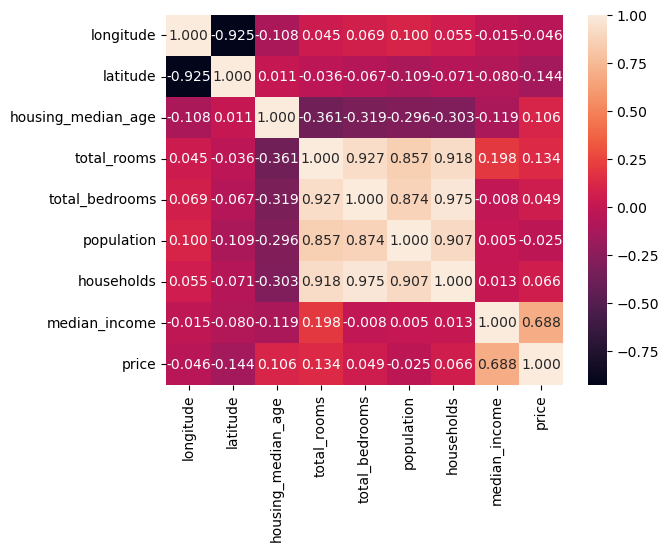

In [12]:
# Heatmap of correlation
sns.heatmap(df.corr(), annot=True, fmt='.3f');

###### From the heatmap we can see that "median_income" is highly correlated with "price"

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


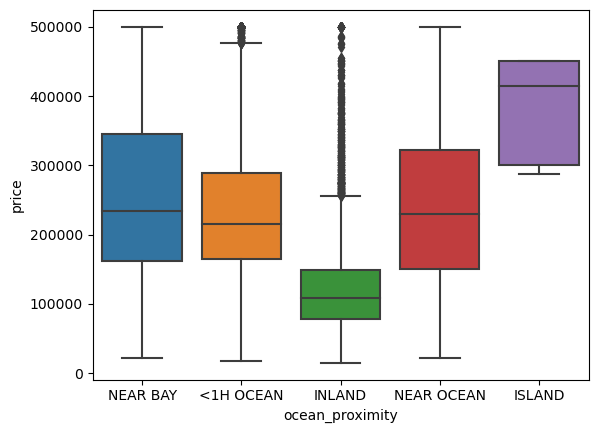

In [13]:
# boxplot of categorical data ( ocean_proximity )

print(df['ocean_proximity'].value_counts())
sns.boxplot(x='ocean_proximity', y='price', data=df);

## Data Preparation

### Convert categorical data into numerical data

In [14]:
# "One-Hot-Encoding" of Categorical Data (ocean_proximity)

df=pd.get_dummies(data=df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,price,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


### Seperate data into feature and label

In [15]:
# Features
X=df.drop('price', axis=1)

In [16]:
# Label (Target)
y=df['price']

### Data Standardization

In [17]:
scaler=MinMaxScaler()
num_var = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X[num_var]=scaler.fit_transform(X[num_var])

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0,0,0,1,0


### Split data

In [18]:
# split data for training and testing
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=.2, random_state=500)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 13)
(4128, 13)
(16512,)
(4128,)


## Mutiple Linear Regression

In [20]:
# Create object for multiple Linear Regression 
Multiple_LR = LinearRegression()

# Train the model with training data 
Multiple_LR.fit(X_train, y_train)

LinearRegression()

In [21]:
# By using the created model predict the values for test data
pred_Mul_LR = Multiple_LR.predict(X_test)

In [22]:
# Compare the actual and predicted values
compare =  pd.DataFrame({"Aactual":y_test, "Predicted":pred_Mul_LR})
compare.head()

,Aactual,Predicted
9441,70200,91168.0
2984,46700,83072.0
8832,500001,286848.0
2047,127200,243680.0
1796,91500,158400.0


### Model Evaluation

#### Error of Multiple  Linear Regression

In [23]:
# Mean Squred Error
MSE = metrics.mean_squared_error(y_test, pred_Mul_LR)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, pred_Mul_LR)
print("Mean Absolute error: {}".format(MAE))


Mean Squared error: 67768.92238356246
Mean Absolute error: 49252.94743217054


Text(0, 0.5, 'Counts')

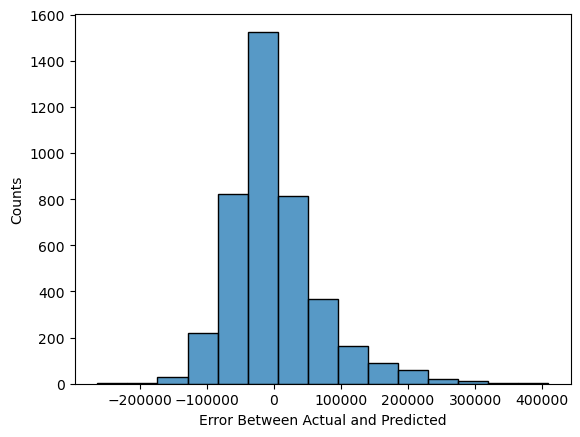

In [24]:
fig = plt.figure()
sns.histplot((y_test - pred_Mul_LR), bins = 15);
plt.xlabel('Error Between Actual and Predicted')
plt.ylabel('Counts')

Text(0, 0.5, 'y_pred')

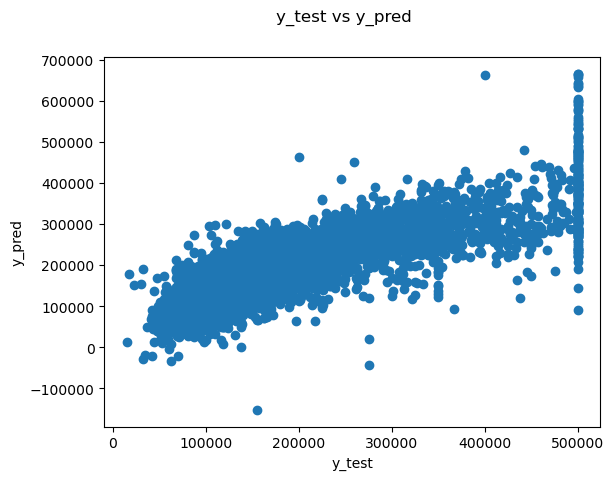

In [25]:
fig = plt.figure()
plt.scatter(y_test,pred_Mul_LR)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred') 

## Decission Tree 

In [26]:
# Create object for Decission Tree
dec_Tree = DecisionTreeClassifier()

# Train the model with training data 
dec_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# By using the created model predict the values for test data
pred_DT = dec_Tree.predict(X_test)

In [28]:
# Compare the actual and predicted values
compare =  pd.DataFrame({"Aactual":y_test, "Predicted":pred_DT})
compare.head()

,Aactual,Predicted
9441,70200,136300
2984,46700,112500
8832,500001,500001
2047,127200,195900
1796,91500,159800


### Model Evaluation

#### Error of Decision Tree Classifier

In [29]:
# Mean Squred Error
MSE = metrics.mean_squared_error(y_test, pred_DT)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, pred_DT)
print("Mean Absolute error: {}".format(MAE))

Mean Squared error: 78640.56019102938
Mean Absolute error: 52417.01841085271


Text(0, 0.5, 'Counts')

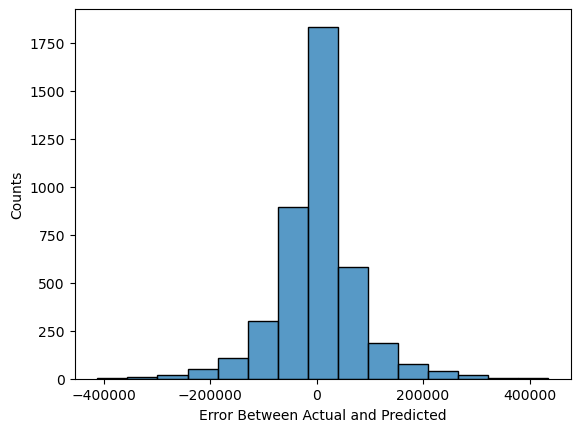

In [30]:
fig = plt.figure()
sns.histplot((y_test - pred_DT), bins = 15);
plt.xlabel('Error Between Actual and Predicted')
plt.ylabel('Counts')

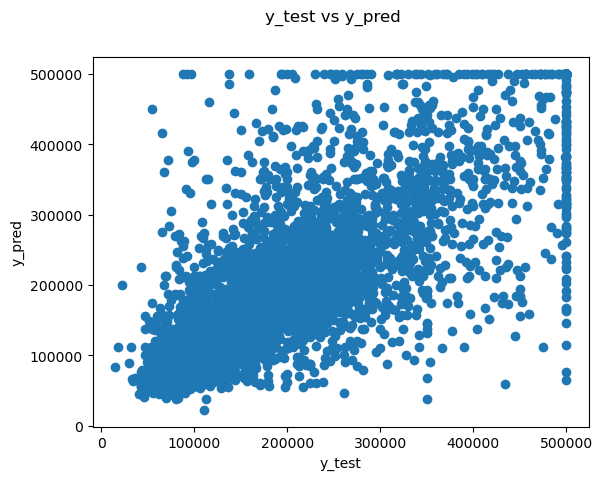

In [31]:
fig = plt.figure()
plt.scatter(y_test, pred_DT)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred');

## Random Forest

In [32]:
# Create object for Random Forest
Rand_forest = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Train the model with training data 
Rand_forest.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [33]:
# By using the created model predict the values for test data
pred_RF = Rand_forest.predict(X_test)

In [34]:
# Compare the actual and predicted values
compare =  pd.DataFrame({"Aactual":y_test, "Predicted":pred_RF})
compare.head()

,Aactual,Predicted
9441,70200,120312.00
2984,46700,51597.00
8832,500001,404915.17
2047,127200,203255.00
1796,91500,101197.00


### Model Evaluation

#### Error of Random Forest 

In [35]:
MSE = metrics.mean_squared_error(y_test, pred_RF)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

MAE = metrics.mean_absolute_error(y_test, pred_RF)
print("Mean Absolute error: {}".format(MAE))

Mean Squared error: 48359.77295769758
Mean Absolute error: 31186.68312742248


Text(0, 0.5, 'Counts')

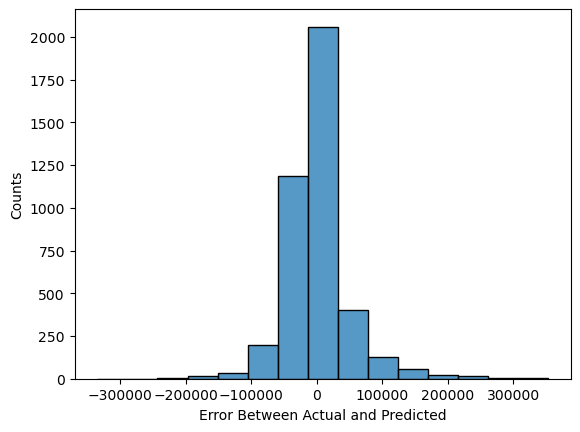

In [36]:
fig = plt.figure()
sns.histplot((y_test - pred_RF), bins = 15);
plt.xlabel('Error Between Actual and Predicted')
plt.ylabel('Counts')

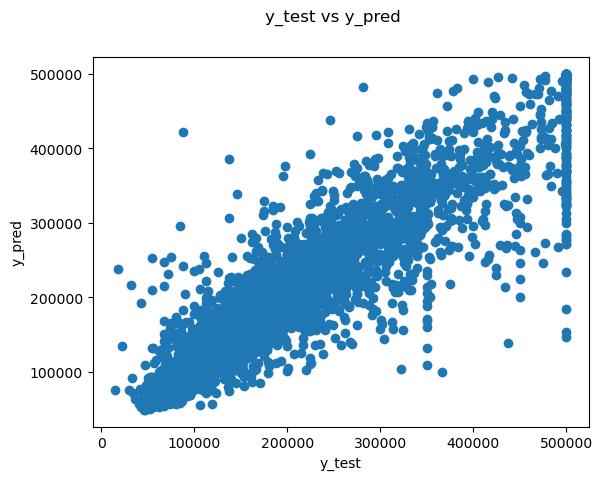

In [37]:
fig = plt.figure()
plt.scatter(y_test, pred_RF)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred');

## Simple Linear Regression

##### As we have seen that 'median_income' is highly correlated with the house price. Let's perform Linear Regression with one independent variable to predict housing values based on median_income.

In [38]:
# Extract 'median_income' column from the independent variables

X_train_income=X_train[['median_income']]
X_test_income=X_test[['median_income']]

In [39]:
# Create object for Simple Linear Regression
regression = LinearRegression()

# Train the model with training data 
regression.fit(X_train_income, y_train)

LinearRegression()

In [40]:
# By using the created model predict the values for test data

# pred_Simple_Linear_Regression
pred_SLR = regression.predict(X_test_income)

In [41]:
# Compare the actual and predicted values
compare = pd.DataFrame({"Aactual":y_test, "Predicted":pred_SLR})
compare.head()

,Aactual,Predicted
9441,70200,165146.788090
2984,46700,110445.959838
8832,500001,214746.373387
2047,127200,329403.477085
1796,91500,117247.617111


### Model Evaluation

#### Error of Simple Linear Regression

In [42]:
# Mean Squared Error
MSE = metrics.mean_squared_error(y_test, pred_SLR)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, pred_SLR)
print("Mean Absolute error: {}".format(MAE))

Mean Squared error: 82766.99074270694
Mean Absolute error: 61937.1538495862


Text(0, 0.5, 'Counts')

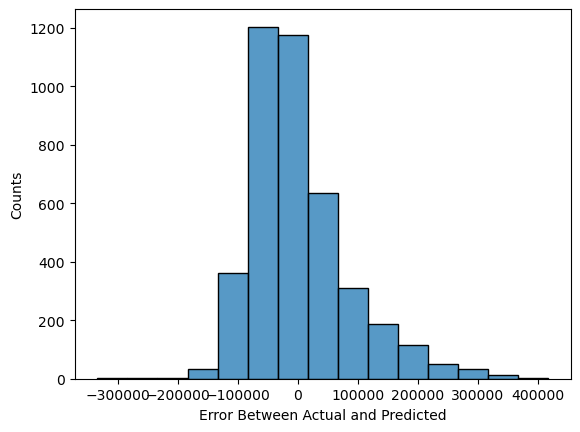

In [43]:
fig = plt.figure()
sns.histplot((y_test - pred_SLR), bins = 15);
plt.xlabel('Error Between Actual and Predicted')
plt.ylabel('Counts')

Text(0, 0.5, 'y_pred')

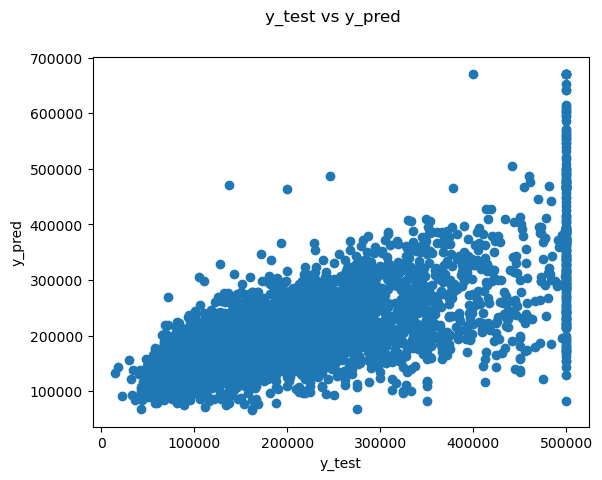

In [44]:
fig = plt.figure()
plt.scatter(y_test, pred_SLR)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred') 